In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('fake_job_postings.csv')

(17880, 18)
   job_id             title          location department salary_range  \
0       1  Marketing Intern  US, NY, New York  Marketing          NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   

                                        requirements benefits  telecommuting  \
0  Experience with content management systems a m...      NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   

  required_education industry   function  fraudulent  
0                NaN      NaN  Marketing           0  
job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description    

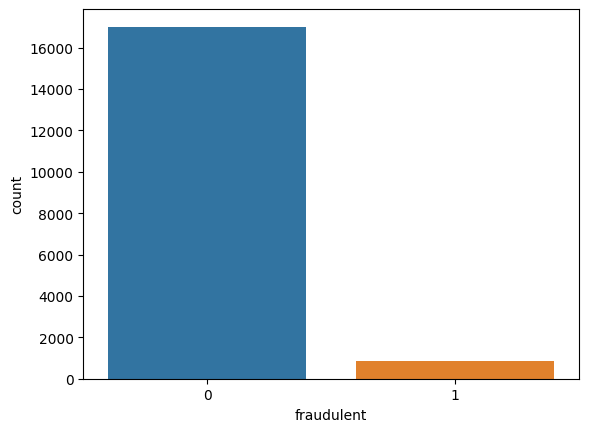

In [3]:
# Check the shape of the dataset
print(df.shape)

# Check the top few rows of the dataset
print(df.head(1))

# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isna().sum())

# Check the distribution of the target variable
sns.countplot(x='fraudulent', data=df)
plt.show()


In [4]:
# Convert categorical variables to numerical variables
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

le = LabelEncoder()
oe = OneHotEncoder()

X['employment_type'] = le.fit_transform(X['employment_type'].astype(str))
X['required_experience'] = le.fit_transform(X['required_experience'].astype(str))
X['required_education'] = le.fit_transform(X['required_education'].astype(str))

X = oe.fit_transform(X).toarray()

# Scaling the independent variables
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Define the model architecture
model = Sequential([
    Dense(64, input_dim=X_train.shape[1]),
    Activation('relu'),
    Dropout(0.5),
    Dense(32),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
358/358 [==============================] - 7s 18ms/step - loss: 0.4706 - accuracy: 0.8975 - val_loss: 0.1805 - val_accuracy: 0.9469
Epoch 2/50
358/358 [==============================] - 6s 15ms/step - loss: 0.2331 - accuracy: 0.9465 - val_loss: 0.1661 - val_accuracy: 0.9574
Epoch 3/50
358/358 [==============================] - 5s 15ms/step - loss: 0.1601 - accuracy: 0.9556 - val_loss: 0.2041 - val_accuracy: 0.9542
Epoch 4/50
358/358 [==============================] - 5s 15ms/step - loss: 0.1047 - accuracy: 0.9680 - val_loss: 0.2010 - val_accuracy: 0.9567
Epoch 5/50
358/358 [==============================] - 6s 16ms/step - loss: 0.0786 - accuracy: 0.9750 - val_loss: 0.2120 - val_accuracy: 0.9507
Epoch 6/50
358/358 [==============================] - 6s 17ms/step - loss: 0.0531 - accuracy: 0.9817 - val_loss: 0.2438 - val_accuracy: 0.9287
Epoch 7/50
358/358 [==============================] - 6s 16ms/step - loss: 0.0452 - accuracy: 0.9837 - val_loss: 0.2733 - val_accuracy: 0.9133

In [6]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)
print("Test accuracy:", accuracy)

56/56 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.9634
Test accuracy: 0.9633668661117554
